In [1]:
# This notebook explores the results for the agent based model

In [2]:
import re
import glob
import json
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option( 'display.max_columns', None )
pd.set_option( 'display.max_rows', None )

# Loading localidades GeoJSON for reference

In [4]:
localidades = gpd.read_file( './data/geo/bogotá/localidades_no_sumapaz.json' )

In [5]:
del localidades[ 'geometry' ]

In [6]:
localidades.head()

,localidad,codigo_localidad
0,Antonio Nariño,15
1,Tunjuelito,6
2,Rafael Uribe Uribe,18
3,La Candelaria,17
4,Barrios Unidos,12


In [7]:
locs = {}
for i, row in localidades.iterrows():
    locs[ str( row[ 'codigo_localidad' ] ) ] = row[ 'localidad' ]
locs

{'15': 'Antonio Nariño',
 '6': 'Tunjuelito',
 '18': 'Rafael Uribe Uribe',
 '17': 'La Candelaria',
 '12': 'Barrios Unidos',
 '13': 'Teusaquillo',
 '16': 'Puente Aranda',
 '14': 'Los Mártires',
 '1': 'Usaquén',
 '2': 'Chapinero',
 '3': 'Santa Fé',
 '4': 'San Cristóbal',
 '5': 'Usme',
 '19': 'Ciudad Bolívar',
 '7': 'Bosa',
 '8': 'Kennedy',
 '9': 'Fontibón',
 '10': 'Engativá',
 '11': 'Suba'}

# Loading ABM results

In [8]:
city = 'bogota'
init_date = pd.to_datetime( '03/06/2020' )

In [9]:
path = './data/agents/{}/*.csv'.format( city )

In [10]:
files = glob.glob( path )

In [11]:
agents = []
exp = 0

for file in files:
    df = pd.read_csv( file )
    df[ 'Fecha' ] = df[ 'Día' ].apply( lambda x: init_date + pd.DateOffset( days = x ) )
    df[ 'exp' ] = exp
    agents.append( df )
    exp = exp + 1

agents = pd.concat( agents )
del agents[ 'Unnamed: 0' ]

In [12]:
agents.shape

(3200, 41)

In [13]:
agents.dtypes

Susceptibles                                   int64
Total infectados                               int64
Graves                                         int64
Críticos                                       int64
Leves                                          int64
Recuperados                                    int64
Rt                                           float64
Recuento_zonas                                object
0-9                                           object
10-19                                         object
20-39                                         object
40-59                                         object
>60                                           object
En_cuarentena                                 object
Restringido_movilidad                         object
Vivos                                          int64
Día                                            int64
Contactos_prom_trabajo                       float64
Contactos_prom_transporte                    f

In [14]:
agents.tail()

,Susceptibles,Total infectados,Graves,Críticos,Leves,Recuperados,Rt,Recuento_zonas,0-9,10-19,20-39,40-59,>60,En_cuarentena,Restringido_movilidad,Vivos,Día,Contactos_prom_trabajo,Contactos_prom_transporte,Contactos_prom_casa,Contactos_prom_trabajo_conm,Contactos_prom_transporte_conm,Contactos_prom_casa_conm,Nuevos_infectados,Detectados,En_testing,En_cama,En_UCI,Detectados_por_intervencion,#Intervenidos,porcentaje_edad_activa_por_zona,porcentaje_edad_activa,tasa_letalidad_por_zona,tasa_letalidad,total_muertos,total_muertos_por_zona,total_muertos_edad_activa,total_muertos_edad_activa_por_zona,zonas intervenidas,Fecha,exp
195,32019,2591,67,5,2519,10577,0.334234,"{9: [1689, 0, 0, 192, 19, 0, 3, 0, 2, 0, 0, 0,...","[5472, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 33, 0, 0]","[5962, 0, 0, 61, 3, 0, 0, 0, 0, 0, 0, 0, 280, ...","[9489, 0, 0, 1283, 84, 0, 15, 0, 12, 1, 0, 1, ...","[6524, 0, 0, 888, 61, 0, 35, 0, 31, 3, 0, 3, 3...","[4572, 0, 0, 287, 14, 0, 17, 0, 15, 1, 0, 1, 1...","[16369, 354, 11, 2, 1629]","[0, 0, 0, 0, 0]",45187,195,1.064775,2.123708,1.645407,1.793826,3.577809,2.772016,162,171,9,42,4,0,0,"{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0....",0.002677,"{1: 0, 2: 0, 3: 0, 4: 1.0, 5: 0, 6: 0.0, 7: 0....",0.033898,6,"{1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 1, 8: ...",0,"{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: ...",{},2020-09-17,15
196,31872,2534,70,5,2459,10781,0.329519,"{9: [1679, 0, 0, 190, 13, 0, 3, 0, 3, 0, 0, 0,...","[5472, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 33, 0, 0]","[5958, 0, 0, 55, 4, 0, 0, 0, 0, 0, 0, 0, 290, ...","[9419, 0, 0, 1259, 72, 0, 17, 0, 14, 1, 0, 1, ...","[6477, 0, 0, 858, 57, 0, 36, 0, 32, 3, 0, 3, 3...","[4546, 0, 0, 287, 28, 0, 17, 0, 15, 1, 0, 1, 1...","[16360, 323, 13, 0, 1687]","[0, 0, 0, 0, 0]",45187,196,1.071459,2.127360,1.630801,1.806298,3.586368,2.749254,161,175,9,42,4,0,0,"{1: 0.00030084235860409147, 2: 0.0, 3: 0.0, 4:...",0.002766,"{1: 0.0, 2: 0, 3: 0, 4: 1.0, 5: 0, 6: 0.0, 7: ...",0.033149,6,"{1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 1, 8: ...",0,"{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: ...",{},2020-09-18,15
197,31753,2450,66,5,2379,10984,0.316327,"{9: [1669, 0, 0, 188, 11, 0, 3, 0, 3, 0, 0, 0,...","[5472, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 33, 0, 0]","[5956, 0, 0, 53, 3, 0, 0, 0, 0, 0, 0, 0, 294, ...","[9357, 0, 0, 1224, 62, 0, 15, 0, 12, 1, 0, 1, ...","[6437, 0, 0, 829, 36, 0, 35, 0, 31, 3, 0, 3, 3...","[4531, 0, 0, 273, 20, 0, 16, 0, 16, 1, 0, 1, 1...","[17235, 434, 17, 3, 2231]","[0, 0, 0, 0, 0]",45187,197,0.957532,1.917166,1.540133,1.712431,3.428622,2.754344,121,177,7,42,4,0,0,"{1: 0.00030084235860409147, 2: 0.0, 3: 0.0, 4:...",0.002766,"{1: 0.0, 2: 0, 3: 0, 4: 1.0, 5: 0, 6: 0.0, 7: ...",0.032787,6,"{1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 1, 8: ...",0,"{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: ...",{},2020-09-19,15
198,31657,2383,65,4,2314,11147,0.313890,"{9: [1661, 0, 0, 188, 5, 0, 3, 0, 3, 0, 0, 0, ...","[5472, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 33, 0, 0]","[5954, 0, 0, 51, 2, 0, 0, 0, 0, 0, 0, 0, 298, ...","[9311, 0, 0, 1192, 51, 0, 16, 0, 11, 1, 0, 1, ...","[6408, 0, 0, 796, 40, 0, 36, 0, 31, 3, 0, 3, 3...","[4512, 0, 0, 275, 10, 0, 13, 0, 13, 0, 0, 0, 1...","[18561, 630, 16, 0, 3188]","[0, 0, 0, 0, 0]",45187,198,0.792617,1.579968,1.385155,1.571429,3.132415,2.746183,103,178,10,42,4,0,0,"{1: 0.00030084235860409147, 2: 0.0, 3: 0.0, 4:...",0.002788,"{1: 0.0, 2: 0, 3: 0, 4: 1.0, 5: 0, 6: 0.0, 7: ...",0.032609,6,"{1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 1, 8: ...",0,"{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: ...",{},2020-09-20,15
199,31528,2351,61,2,2288,11308,0.311782,"{9: [1648, 0, 0, 189, 13, 0, 4, 0, 3, 0, 0, 0,...","[5472, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 33, 0, 0]","[5954, 0, 0, 46, 1, 0, 0, 0, 0, 0, 0, 0, 303, ...","[9249, 0, 0, 1171, 65, 0, 13, 0, 8, 1, 0, 1, 5...","[6356, 0, 0, 797, 47, 0, 35, 0, 29, 1, 0, 1, 4...","[4497, 0, 0, 274, 21, 0, 13, 0, 12, 0, 0, 0, 1...","[16175, 290, 14, 0, 1769]","[0, 0, 0, 0, 0]",45187,199,1.070418,2.131011,1.641158,1.795501,3.574520,2.752849

In [15]:
def sum_quarantine( x ):
    x = json.loads( x )
    people_in_q = x[ 0 ] + x[ 1 ] + x[ 2 ] + x[ 3 ] + x[ 4 ]
    return people_in_q

In [16]:
agents_norm = []

for exp in agents[ 'exp' ].unique():
    df = agents.loc[ agents[ 'exp' ] == exp ]
    total_people = df[ 'Vivos' ].values[ 0 ]
    df[ 'Graves' ] = df[ 'Graves' ] / total_people
    df[ 'Críticos' ] = df[ 'Críticos' ] / total_people
    df[ 'Fallecidos' ] = ( total_people - df[ 'Vivos' ] ) / total_people
    df[ 'R0' ] = ( df[ 'Nuevos_infectados' ].cumsum() / total_people )
    df[ 'Cuarentena' ] = df[ 'En_cuarentena' ].apply( lambda x: sum_quarantine( x ) ) / total_people
    agents_norm.append( df[ [ 'exp', 'Fecha', 'Graves', 'Críticos', 'Fallecidos', 'R0', 'Rt', 'Cuarentena' ] ] )

agents_norm = pd.concat( agents_norm )

/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [17]:
agents_norm.tail()

,exp,Fecha,Graves,Críticos,Fallecidos,R0,Rt,Cuarentena
195,15,2020-09-17,0.001483,0.000111,0.000133,0.288828,0.334234,0.406368
196,15,2020-09-18,0.001549,0.000111,0.000133,0.292390,0.329519,0.406767
197,15,2020-09-19,0.001460,0.000111,0.000133,0.295068,0.316327,0.440776
198,15,2020-09-20,0.001438,0.000089,0.000133,0.297347,0.313890,0.495541
199,15,2020-09-21,0.001350,0.000044,0.000133,0.300312,0.311782,0.403779


In [18]:
def ci( x ):
    try:
        return 1.96 * np.std( x ) / np.sqrt( len( x ) )
    except ZeroDivisionError:
        return 0

agents_norm_grouped = agents_norm.groupby( 'Fecha' ).agg( { 'Graves': [ 'mean', ci ], 'Críticos': [ 'mean', ci ], 'Fallecidos': [ 'mean', ci ], 'R0': [ 'mean', ci ], 'Rt': [ 'mean', ci ], 'Cuarentena': [ 'mean' ] } )
agents_norm_grouped.columns = [ '_'.join( col ).strip() for col in agents_norm_grouped.columns.values ]

In [19]:
agents_norm_grouped.tail()

,Graves_mean,Graves_ci,Críticos_mean,Críticos_ci,Fallecidos_mean,Fallecidos_ci,R0_mean,R0_ci,Rt_mean,Rt_ci,Cuarentena_mean
Fecha,,,,,,,,,,,
2020-09-17,0.001137,0.000221,0.000112,0.000032,0.000079,0.000029,0.252890,0.042864,0.302168,0.043288,0.405993
2020-09-18,0.001145,0.000219,0.000118,0.000034,0.000082,0.000031,0.255940,0.043140,0.297741,0.042529,0.406407
2020-09-19,0.001130,0.000214,0.000118,0.000034,0.000082,0.000031,0.258610,0.043385,0.293251,0.041724,0.441885
2020-09-20,0.001115,0.000212,0.000119,0.000036,0.000083,0.000031,0.260735,0.043571,0.290573,0.042394,0.496413
2020-09-21,0.001105,0.000209,0.000116,0.000037,0.000084,0.000030,0.263086,0.043792,0.293577,0.042095,0.405782


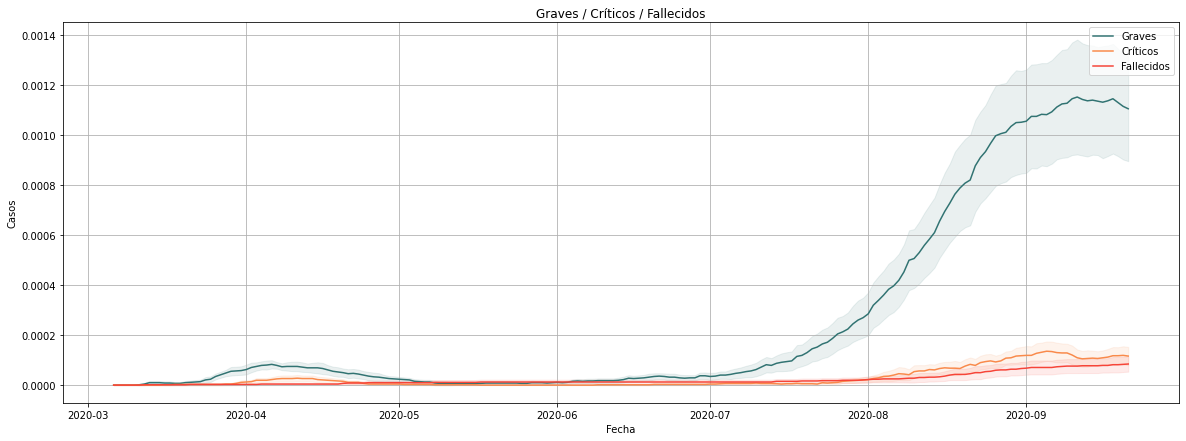

In [20]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'Graves_mean' ], label = 'Graves', color = '#317372' )
ax.fill_between( agents_norm_grouped.index, ( agents_norm_grouped[ 'Graves_mean' ] - agents_norm_grouped[ 'Graves_ci' ] ), ( agents_norm_grouped[ 'Graves_mean' ] + agents_norm_grouped[ 'Graves_ci' ] ), color = '#317372', alpha = .1 )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'Críticos_mean' ], label = 'Críticos', color = '#f98a4b' )
ax.fill_between( agents_norm_grouped.index, ( agents_norm_grouped[ 'Críticos_mean' ] - agents_norm_grouped[ 'Críticos_ci' ] ), ( agents_norm_grouped[ 'Críticos_mean' ] + agents_norm_grouped[ 'Críticos_ci' ] ), color = '#f98a4b', alpha = .1 )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'Fallecidos_mean' ], label = 'Fallecidos', color = '#f64438' )
ax.fill_between( agents_norm_grouped.index, ( agents_norm_grouped[ 'Fallecidos_mean' ] - agents_norm_grouped[ 'Fallecidos_ci' ] ), ( agents_norm_grouped[ 'Fallecidos_mean' ] + agents_norm_grouped[ 'Fallecidos_ci' ] ), color = '#f64438', alpha = .1 )

plt.title( 'Graves / Críticos / Fallecidos' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Casos' )
plt.grid( True )
plt.legend()

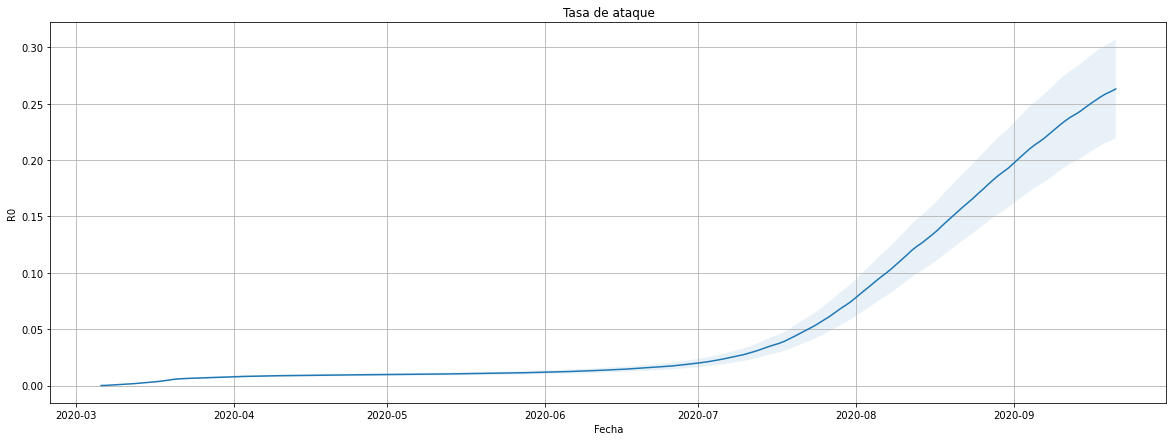

In [21]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'R0_mean' ] )
ax.fill_between( agents_norm_grouped.index, ( agents_norm_grouped[ 'R0_mean' ] - agents_norm_grouped[ 'R0_ci' ] ), ( agents_norm_grouped[ 'R0_mean' ] + agents_norm_grouped[ 'R0_ci' ] ), alpha = .1 )

plt.title( 'Tasa de ataque' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'R0' )
plt.grid( True )

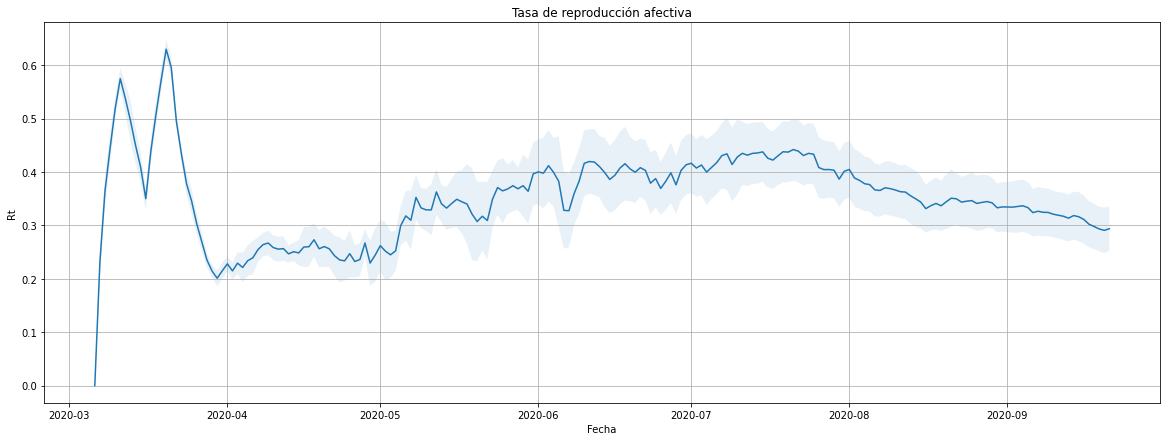

In [22]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'Rt_mean' ] )
ax.fill_between( agents_norm_grouped.index, ( agents_norm_grouped[ 'Rt_mean' ] - agents_norm_grouped[ 'Rt_ci' ] ), ( agents_norm_grouped[ 'Rt_mean' ] + agents_norm_grouped[ 'Rt_ci' ] ), alpha = .1 )

plt.title( 'Tasa de reproducción afectiva' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Rt' )
plt.grid( True )

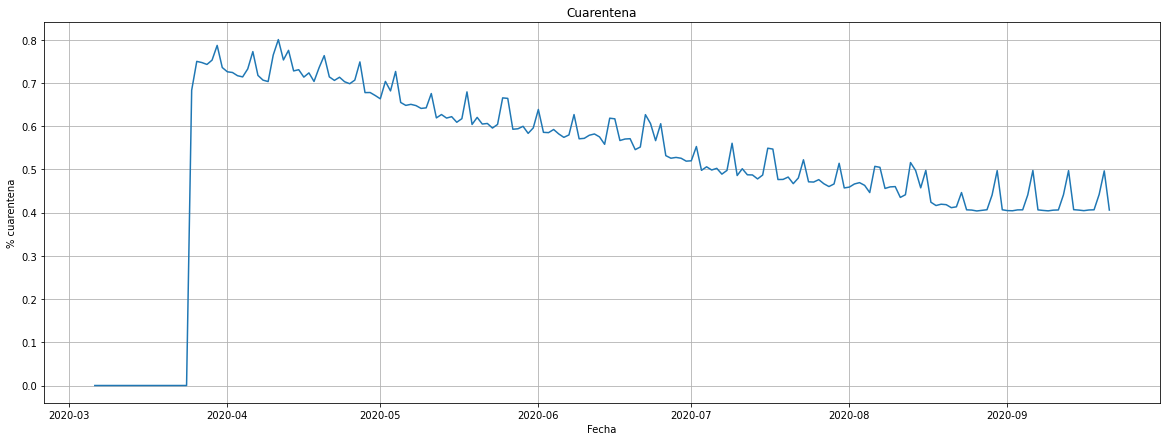

In [23]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'Cuarentena_mean' ] )

plt.title( 'Cuarentena' )
plt.xlabel( 'Fecha' )
plt.ylabel( '% cuarentena' )
plt.grid( True )

In [24]:
agents_norm.tail()

,exp,Fecha,Graves,Críticos,Fallecidos,R0,Rt,Cuarentena
195,15,2020-09-17,0.001483,0.000111,0.000133,0.288828,0.334234,0.406368
196,15,2020-09-18,0.001549,0.000111,0.000133,0.292390,0.329519,0.406767
197,15,2020-09-19,0.001460,0.000111,0.000133,0.295068,0.316327,0.440776
198,15,2020-09-20,0.001438,0.000089,0.000133,0.297347,0.313890,0.495541
199,15,2020-09-21,0.001350,0.000044,0.000133,0.300312,0.311782,0.403779


In [25]:
agents_norm[ [ 'exp', 'Fecha', 'R0', 'Rt', 'Cuarentena' ] ].to_csv( './agents-viz/data/{}-agents-multi.csv'.format( city ), index = False )

In [26]:
pd.melt( agents_norm[ [ 'exp', 'Fecha', 'Graves', 'Críticos', 'Fallecidos' ] ], id_vars = [ 'Fecha' ], value_vars =[ 'Graves', 'Críticos', 'Fallecidos' ] ).to_csv( './agents-viz/data/{}-agents2-multi.csv'.format( city ), index = False )

# By localidades

In [27]:
recuento_zonas = { 0: 'Susceptibles', 1: '?_1', 2: '?_2', 3: 'Leves', 4: '?_4', 5: '?_5', 6: 'Graves', 7: '?_7', 8: '?_8', 9: 'Críticos', 10: '?_10', 11: '?_11', 12: 'Recuperados', 13: '?_13', 14: '?_14'  }

In [28]:
def expand_by_loc( x ):
    
    replacer = re.compile("(\d+)")
    x[ 'Recuento_zonas' ] = replacer.sub( r'"\1"', x[ 'Recuento_zonas' ] )
    if city == 'cartagena':
        x[ 'Recuento_zonas' ] = x[ 'Recuento_zonas' ].replace( "'", '"' )
    #print( x[ 'Recuento_zonas' ] )
    
    x[ 'Recuento_zonas' ] = json.loads( x[ 'Recuento_zonas' ] )
    ds = []
    for z in x[ 'Recuento_zonas' ].keys():
        d = dict()
        d[ 'exp' ] = row[ 'exp' ]
        if city == 'bogota':
            d[ 'Localidad' ] = locs[ z ]
        else:
            d[ 'Localidad' ] = z
        d[ 'Día' ] = row[ 'Día' ]
        d[ 'Fecha' ] = init_date + pd.DateOffset( days = d[ 'Día' ] )
        for i in recuento_zonas.keys():
            d[ recuento_zonas[ i ] ] = int( x[ 'Recuento_zonas' ][ z ][ i ] )
        ds.append( d )
    
    return ds

agents_locs = []
for i, row in agents.iterrows():
    agents_locs = agents_locs + expand_by_loc( row )

agents_locs = pd.DataFrame( agents_locs )

In [29]:
agents_locs_norm = []

for exp in agents_locs[ 'exp' ].unique():
    for loc in agents_locs[ 'Localidad' ].unique():
        df = agents_locs.loc[ ( agents_locs[ 'exp' ] == exp ) & ( agents_locs[ 'Localidad' ] == loc ) ]
        total_people = ( df[ 'Susceptibles' ] + df[ 'Leves' ] + df[ 'Graves' ] + df[ 'Críticos' ] + df[ 'Recuperados' ] ).values[ 0 ]

        df[ 'Fallecidos' ] = ( total_people - ( df[ 'Susceptibles' ] + df[ 'Leves' ] + df[ 'Graves' ] + df[ 'Críticos' ] + df[ 'Recuperados' ] ) ) / total_people
        df[ 'Graves' ] = df[ 'Graves' ] / total_people
        df[ 'Críticos' ] = df[ 'Críticos' ] / total_people
        df[ 'R0' ] = ( df[ '?_4' ].cumsum() / total_people )
        agents_locs_norm.append( df[ [ 'exp', 'Fecha', 'Localidad', 'Graves', 'Críticos', 'Fallecidos', 'R0' ] ] )

agents_locs_norm = pd.concat( agents_locs_norm )

/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [30]:
agents_locs_norm.tail()

,exp,Fecha,Localidad,Graves,Críticos,Fallecidos,R0
60723,15,2020-09-17,La Candelaria,0.0,0.0,0.0,0.060345
60742,15,2020-09-18,La Candelaria,0.0,0.0,0.0,0.068966
60761,15,2020-09-19,La Candelaria,0.0,0.0,0.0,0.077586
60780,15,2020-09-20,La Candelaria,0.0,0.0,0.0,0.086207
60799,15,2020-09-21,La Candelaria,0.0,0.0,0.0,0.086207


In [32]:
agents_locs_norm[ [ 'exp', 'Fecha', 'Localidad', 'R0' ] ].to_csv( './agents-viz/data/{}-agents-locs-multi.csv'.format( city ), index = False )

In [ ]:
locs = list( all_locs[ 'Localidad' ].unique() )

fig = plt.figure( figsize = ( 20, 27 ) )

for i in range( 1, len( locs ) + 1 ):
    current_loc = all_locs[ all_locs[ 'Localidad' ] == locs[ i - 1 ] ]
    pop = ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ).values[ 0 ]
    plt.subplot( 7, 3, i )
    plt.plot( current_loc[ 'Fecha' ], current_loc[ 'Graves' ], label = 'Graves', color = '#317372' )
    plt.plot( current_loc[ 'Fecha' ], current_loc[ 'Críticos' ], label = 'Críticos', color = '#f98a4b' )
    plt.plot( current_loc[ 'Fecha' ], ( pop - ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ) ), label = 'Fallecidos', color = '#f64438' )
    plt.title( locs[ i - 1 ] )
    plt.ylim( [ 0, 60 ] )
    plt.grid( True )

fig.legend( labels = [ 'Graves', 'Críticos', 'Fallecidos' ], loc = 'center right' )

In [ ]:
locs = list( all_locs[ 'Localidad' ].unique() )

fig = plt.figure( figsize = ( 20, 7 ) )
for loc in locs:
    current_loc = all_locs[ all_locs[ 'Localidad' ] == loc ]
    plt.plot( current_loc[ 'Fecha' ], current_loc[ 'Graves' ], label = loc )
plt.title( 'Graves' )
plt.grid( True )
plt.legend()

In [ ]:
locs = list( all_locs[ 'Localidad' ].unique() )

fig = plt.figure( figsize = ( 20, 7 ) )
for loc in locs:
    current_loc = all_locs[ all_locs[ 'Localidad' ] == loc ]
    plt.plot( current_loc[ 'Fecha' ], current_loc[ 'Críticos' ], label = loc )
plt.title( 'Críticos' )
plt.grid( True )
plt.legend()

In [ ]:
locs = list( all_locs[ 'Localidad' ].unique() )

fig = plt.figure( figsize = ( 20, 7 ) )
for loc in locs:
    current_loc = all_locs[ all_locs[ 'Localidad' ] == loc ]
    pop = ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ).values[ 0 ]
    plt.plot( current_loc[ 'Fecha' ], ( pop - ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ) ), label = loc )
plt.title( 'Fallecidos' )
plt.grid( True )
plt.legend()

In [ ]:
locs = list( all_locs[ 'Localidad' ].unique() )

fig = plt.figure( figsize = ( 20, 27 ) )

for i in range( 1, len( locs ) + 1 ):
    current_loc = all_locs[ all_locs[ 'Localidad' ] == locs[ i - 1 ] ]
    pop = ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ).values[ 0 ]
    plt.subplot( 7, 3, i )
    plt.plot( current_loc[ 'Fecha' ], current_loc[ '?_4' ].cumsum() / pop, label = 'Tasa de ataque' )
    plt.title( locs[ i - 1 ] )
    plt.ylim( [ 0, 1.0 ] )
    plt.grid( True )

fig.legend( labels = [ 'Tasa de ataque' ], loc = 'center right' )

In [ ]:
locs = list( all_locs[ 'Localidad' ].unique() )

agents_locs = []
for loc in locs:
    current_loc = all_locs[ all_locs[ 'Localidad' ] == loc ]
    pop = ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ).values[ 0 ]
    
    current_loc[ 'Fallecidos' ] = ( pop - ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ) ) / pop
    current_loc[ 'Graves' ] = current_loc[ 'Graves' ] / pop
    current_loc[ 'Críticos' ] = current_loc[ 'Críticos' ] / pop
    
    
    current_loc = pd.melt( current_loc[ [ 'Fecha', 'Graves', 'Críticos', 'Fallecidos' ] ], id_vars = [ 'Fecha' ], value_vars =[ 'Graves', 'Críticos', 'Fallecidos' ] )
    current_loc[ 'Localidad' ] = loc
    agents_locs.append( current_loc )
    
pd.concat( agents_locs ).to_csv( './agents-viz/data/{}-agents-locs2.csv'.format( city ), index = False )

In [ ]:
locs = list( all_locs[ 'Localidad' ].unique() )

agents_locs = []
for loc in locs:
    current_loc = all_locs[ all_locs[ 'Localidad' ] == loc ]
    pop = ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ).values[ 0 ]
    
    current_loc[ 'R0' ] = current_loc[ '?_4' ].cumsum() / pop
    current_loc[ 'Localidad' ] = loc
    agents_locs.append( current_loc[ [ 'Fecha', 'Localidad', 'R0' ] ] )
    
pd.concat( agents_locs ).to_csv( './agents-viz/data/{}-agents-locs.csv'.format( city ), index = False )

# By age groups

In [ ]:
grupo_edad = { 0: 'Susceptibles', 1: '?_1', 2: '?_2', 3: 'Leves', 4: '?_4', 5: '?_5', 6: 'Graves', 7: '?_7', 8: '?_8', 9: 'Críticos', 10: '?_10', 11: '?_11', 12: 'Recuperados', 13: '?_13', 14: '?_14'  }

In [ ]:
age_ranges = {
    'bogota': [ '0-4', '5-19', '20-39', '40-59', '>60' ],
    'cartagena': [ '0-9', '10-19', '20-39', '40-59', '>60' ]
}

In [ ]:
def expand_by_age( x ):
    ds = []
    for a in age_ranges[ city ]:
        x[ a ] = json.loads( x[ a ] )
        d = dict()
        d[ 'Grupo de edad' ] = a
        d[ 'Día' ] = row[ 'Día' ]
        for i in range( 15 ):
            d[ grupo_edad[ i ] ] = x[ a ][ i ]
        ds.append( d )
    return ds

all_ages = []
for i, row in agents.iterrows():
    all_ages = all_ages + expand_by_age( row )

all_ages = pd.DataFrame( all_ages )

In [ ]:
all_ages[ 'Fecha' ] = all_ages[ 'Día' ].apply( lambda x: pd.to_datetime( '03/06/2020' ) + pd.DateOffset( days = x ) )

In [ ]:
all_ages.tail()

In [ ]:
ages = list( all_ages[ 'Grupo de edad' ].unique() )

fig = plt.figure( figsize = ( 20, 8 ) )

for i in range( 1, len( ages ) + 1 ):
    current_age = all_ages[ all_ages[ 'Grupo de edad' ] == ages[ i - 1 ] ]
    plt.subplot( 2, 3, i )
    plt.plot( current_age[ 'Fecha' ], current_age[ 'Graves' ], label = 'Graves', color = '#317372' )
    plt.plot( current_age[ 'Fecha' ], current_age[ 'Críticos' ], label = 'Críticos', color = '#f98a4b' )
    plt.plot( current_age[ 'Fecha' ], ( pop - ( current_age[ 'Susceptibles' ] + current_age[ 'Leves' ] + current_age[ 'Graves' ] + current_age[ 'Críticos' ] + current_age[ 'Recuperados' ] ) ), label = 'Fallecidos', color = '#f64438' )
    plt.title( ages[ i - 1 ] )
    plt.ylim( [ 0, 90 ] )
    plt.grid( True )

fig.legend( labels = [ 'Graves', 'Críticos', 'Fallecidos' ], loc = 'center right' )

In [ ]:
ages = list( all_ages[ 'Grupo de edad' ].unique() )

fig = plt.figure( figsize = ( 20, 8 ) )

for i in range( 1, len( ages ) + 1 ):
    current_age = all_ages[ all_ages[ 'Grupo de edad' ] == ages[ i - 1 ] ]
    pop = ( current_age[ 'Susceptibles' ] + current_age[ 'Leves' ] + current_age[ 'Graves' ] + current_age[ 'Críticos' ] + current_age[ 'Recuperados' ] ).values[ 0 ]
    plt.subplot( 2, 3, i )
    plt.plot( current_age[ 'Fecha' ], current_age[ '?_4' ].cumsum() / pop, label = 'Tasa de ataque' )
    plt.title( ages[ i - 1 ] )
    plt.ylim( [ 0, 1 ] )
    plt.grid( True )

fig.legend( labels = [ 'Tasa de ataque' ], loc = 'center right' )

In [ ]:
age = list( all_ages[ 'Grupo de edad' ].unique() )

agents_ages = []
for age in ages:
    current_age = all_ages[ all_ages[ 'Grupo de edad' ] == age]
    pop = ( current_age[ 'Susceptibles' ] + current_age[ 'Leves' ] + current_age[ 'Graves' ] + current_age[ 'Críticos' ] + current_age[ 'Recuperados' ] ).values[ 0 ]
    
    current_age[ 'Fallecidos' ] = ( pop - ( current_age[ 'Susceptibles' ] + current_age[ 'Leves' ] + current_age[ 'Graves' ] + current_age[ 'Críticos' ] + current_age[ 'Recuperados' ] ) ) / pop
    current_age[ 'Graves' ] = current_age[ 'Graves' ] / pop
    current_age[ 'Críticos' ] = current_age[ 'Críticos' ] / pop
    
    
    current_age = pd.melt( current_age[ [ 'Fecha', 'Graves', 'Críticos', 'Fallecidos' ] ], id_vars = [ 'Fecha' ], value_vars =[ 'Graves', 'Críticos', 'Fallecidos' ] )
    current_age[ 'Grupo de edad' ] = age
    agents_ages.append( current_age )
    
pd.concat( agents_ages ).to_csv( './agents-viz/data/{}-agents-ages2.csv'.format( city ), index = False )

In [ ]:
quarentenas = { 0: 'Susceptibles', 1: 'Leves', 2: 'Graves', 3: 'Críticos', 4: 'Recuperados'  }

In [ ]:
def expand_by_quarintine( x ):
    ds = []
    x[ 'En_cuarentena' ] = json.loads( x[ 'En_cuarentena' ] )
    d = dict()
    d[ 'Día' ] = row[ 'Día' ]
    for i in range( 5 ):
        d[ quarentenas[ i ] ] = x[ 'En_cuarentena' ][ i ]
    ds.append( d )
    return ds

all_quarintines = []
for i, row in agents.iterrows():
    all_quarintines = all_quarintines + expand_by_quarintine( row )

all_quarintines = pd.DataFrame( all_quarintines )

In [ ]:
all_quarintines.tail()

In [ ]:
plt.plot( all_quarintines[ 'Día' ], ( all_quarintines[ 'Susceptibles' ] + all_quarintines[ 'Recuperados' ] + all_quarintines[ 'Leves' ] + all_quarintines[ 'Graves' ] + all_quarintines[ 'Críticos' ] ) )

In [ ]:
del agents[ 'Recuento_zonas' ]
del agents[ '0-4' ]
del agents[ '5-19' ]
del agents[ '20-39' ]
del agents[ '40-59' ]
del agents[ '>60' ]
del agents[ 'En_cuarentena' ]

In [ ]:
agents.tail()

In [ ]:
agents.dtypes

In [ ]:
agents.to_csv( './data/agents/agents_bogota.csv', index = False )